In [91]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt

# CAS Data Science Projekt Sleep Analysis - Linear Regression

# Prepare data


In [92]:
data = pd.read_csv('prepared/fitbit_data_moon_crisp.csv', index_col=0)
data.dropna(inplace=True)
data.drop(columns=['date', 'revitalization_score'], inplace=True)
data.drop(columns=['restlessness'], inplace=True)
data['scaled_temperature'] = data['temperature'].apply(lambda x: 80+x)
data.drop(columns=['temperature'], inplace=True)

data.rename(columns={'overall_score':'score', 'duration_score':'DUS', 'deep_sleep_in_minutes':'DS', 'composition_score':'CS', 'Moon Phase': 'moon', 'scaled_temperature':'temp','resting_heart_rate':'RHR', 'bpm':"BPM"}, inplace=True)

In [93]:
data.head(5)

,score,CS,DUS,DS,RHR,BPM,moon,temp
0,67,17,35,66,60,68.873969,New Moon,77.505155
2,88,21,45,126,60,67.206731,First Quarter,76.899359
3,56,15,26,23,56,67.187992,Third Quarter,76.917705
4,75,20,36,69,55,69.163313,First Quarter,77.016326
5,68,19,31,69,60,61.607115,New Moon,77.858560


In [94]:
mod = smf.ols(formula='score ~ CS + DUS + DS + RHR + BPM + moon + temp', data=data).fit()

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     58.46
Date:                Fri, 24 Jun 2022   Prob (F-statistic):           2.89e-37
Time:                        11:44:14   Log-Likelihood:                -265.22
No. Observations:                 117   AIC:                             550.4
Df Residuals:                     107   BIC:                             578.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.21

In [ ]:
print(mod.summary())

In [95]:
np.sqrt(mod.scale)

2.4413498021446323

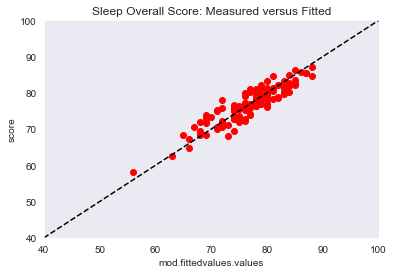

In [99]:
plt.close()

plt.scatter(data.score, mod.fittedvalues.values, color='red')
plt.xlim([40,100])
plt.ylim([40,100])
plt.grid()
plt.axhline(y=0, color='black', linewidth=0.5)
plt.axvline(x=0, color='black', linewidth=0.5)
plt.title('Sleep Overall Score: Measured versus Fitted')
plt.xlabel('mod.fittedvalues.values')
plt.ylabel('score')
plt.axline((1, 1), slope=1, color='black', ls="--")
plt.show()



In [101]:
mod.mse_total

32.533303860890065